# Final Project Data Mining

## Data Preprocessing and K-Means clustering

### Input Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


water_treatment = ('Dataset/Water Treatment Plant Data Set/water-treatment.data')
data = pd.read_csv(water_treatment,names=[
        "Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
        "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D"
        ,"SSV-D","SED-D","COND-D","PH-S","DBO-S","SQO-S","SS-S","SSV-S","SED-S","COND-S"
        ,"RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G"
        ,"RD-SS-G","RD-SED-G"],
        engine='python',
        na_values="?")
display(data.head())
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
    print('%s: %d' % (col,data[col].isnull().sum()))
data.describe()
data.dtypes

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
D-1/3/90,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
D-2/3/90,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
D-4/3/90,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
D-5/3/90,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
D-6/3/90,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


Number of instances = 527
Number of attributes = 38
Number of missing values:
Q-E: 18
ZN-E: 3
PH-E: 0
DBO-E: 23
DQO-E: 6
SS-E: 1
SSV-E: 11
SED-E: 25
COND-E: 0
PH-P: 0
DBO-P: 40
SS-P: 0
SSV-P: 11
SED-P: 24
COND-P: 0
PH-D: 0
DBO-D: 28
DQO-D: 9
SS-D: 2
SSV-D: 13
SED-D: 25
COND-D: 0
PH-S: 1
DBO-S: 23
SQO-S: 18
SS-S: 5
SSV-S: 17
SED-S: 28
COND-S: 1
RD-DBO-P: 62
RD-SS-P: 4
RD-SED-P: 27
RD-DBO-S: 40
RD-DQO-S: 26
RD-DBO-G: 36
RD-DQO-G: 25
RD-SS-G: 8
RD-SED-G: 31


Q-E         float64
ZN-E        float64
PH-E        float64
DBO-E       float64
DQO-E       float64
SS-E        float64
SSV-E       float64
SED-E       float64
COND-E        int64
PH-P        float64
DBO-P       float64
SS-P          int64
SSV-P       float64
SED-P       float64
COND-P        int64
PH-D        float64
DBO-D       float64
DQO-D       float64
SS-D        float64
SSV-D       float64
SED-D       float64
COND-D        int64
PH-S        float64
DBO-S       float64
SQO-S       float64
SS-S        float64
SSV-S       float64
SED-S       float64
COND-S      float64
RD-DBO-P    float64
RD-SS-P     float64
RD-SED-P    float64
RD-DBO-S    float64
RD-DQO-S    float64
RD-DBO-G    float64
RD-DQO-G    float64
RD-SS-G     float64
RD-SED-G    float64
dtype: object

### Impute Missing Value

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.metrics import accuracy_score
import impyute as impy
from sklearn.cluster import KMeans


print('-- Pure Dataset -- ')
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d\n' % (data.shape[1]))

dataset_drop = data.dropna(inplace=False)
print('-- Impute Drop NaN Value -- ')
print('Number of instances = %d' % (dataset_drop.shape[0]))
print('Number of attributes = %d\n' % (dataset_drop.shape[1]))

print('-- Impute Median using Numpy to NaN Value -- ')

dataset_median = data.fillna(data.median())
print('Number of instances = %d' % (dataset_median.shape[0]))
print('Number of attributes = %d\n' % (dataset_median.shape[1]))

print('-- Impute mean using Numpy to NaN Value -- ')

dataset_mean = data.fillna(data.mean())
print('Number of instances = %d' % (dataset_mean.shape[0]))
print('Number of attributes = %d\n' % (dataset_mean.shape[1]))


-- Pure Dataset -- 
Number of instances = 527
Number of attributes = 38

-- Impute Drop NaN Value -- 
Number of instances = 380
Number of attributes = 38

-- Impute Median using Numpy to NaN Value -- 
Number of instances = 527
Number of attributes = 38

-- Impute mean using Numpy to NaN Value -- 
Number of instances = 527
Number of attributes = 38



### Cluster Dataset Impute Mean with K-Means

In [3]:
X = dataset_mean[["Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
        "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D"
        ,"SSV-D","SED-D","COND-D","PH-S","DBO-S","SQO-S","SS-S","SSV-S","SED-S","COND-S"
        ,"RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G"
        ,"RD-SS-G","RD-SED-G"]]

cluster_range = range( 2, 11 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( dataset_mean )
    silhouette_score = metrics.silhouette_score(dataset_mean,clusters.labels_,metric ='euclidean')
    cluster_errors.append( silhouette_score )

clusters_df_mean = pd.DataFrame( {"num_clusters":cluster_range, "shilouette_score": cluster_errors } )
print("DATASET IMPUTE MEAN")
clusters_df_mean[0:10]

DATASET IMPUTE MEAN


,num_clusters,shilouette_score
0,2,0.582743
1,3,0.472387
2,4,0.481502
3,5,0.481128
4,6,0.480959
5,7,0.468105
6,8,0.452403
7,9,0.422870
8,10,0.423040


### Cluster Dataset Impute Median with K-Means

In [4]:
X = dataset_median[["Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
        "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D"
        ,"SSV-D","SED-D","COND-D","PH-S","DBO-S","SQO-S","SS-S","SSV-S","SED-S","COND-S"
        ,"RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G"
        ,"RD-SS-G","RD-SED-G"]]

cluster_range = range( 2, 11 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( dataset_median )
    silhouette_score = metrics.silhouette_score(dataset_median,clusters.labels_,metric ='euclidean')
    cluster_errors.append( silhouette_score )

clusters_df_median = pd.DataFrame( {"num_clusters":cluster_range, "shilouette_score": cluster_errors } )
print("DATASET IMPUTE MEDIAN")
clusters_df_median[0:10]

DATASET IMPUTE MEDIAN


,num_clusters,shilouette_score
0,2,0.591011
1,3,0.469268
2,4,0.496293
3,5,0.483069
4,6,0.486860
5,7,0.460452
6,8,0.447743
7,9,0.416870
8,10,0.424652


### Cluster Dataset Impute Drop with K-Means

In [5]:
X = dataset_drop[["Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
        "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D"
        ,"SSV-D","SED-D","COND-D","PH-S","DBO-S","SQO-S","SS-S","SSV-S","SED-S","COND-S"
        ,"RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G"
        ,"RD-SS-G","RD-SED-G"]]

cluster_range = range( 2, 11 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( dataset_drop )
    silhouette_score = metrics.silhouette_score(dataset_drop,clusters.labels_,metric ='euclidean')
    cluster_errors.append( silhouette_score )

clusters_df_drop = pd.DataFrame( {"num_clusters":cluster_range, "shilouette_score": cluster_errors } )
print("DATASET IMPUTE DROP")
clusters_df_drop[0:10]

DATASET IMPUTE DROP


,num_clusters,shilouette_score
0,2,0.583614
1,3,0.462625
2,4,0.502949
3,5,0.489779
4,6,0.494023
5,7,0.468507
6,8,0.445363
7,9,0.426098
8,10,0.428144


In [6]:
from scipy import stats
z = np.abs(stats.zscore(dataset_median))
#print(z)
threshold = 3
#print(np.where(z > 3))

dataset_median_outliers = dataset_median[(z <= 3).all(axis=1) & (z > -3).all(axis=1)]

dataset_median_outliers.shape

(427, 38)

### Silhoutte analysis for k-means clustering

For n_clusters = 2 The average silhouette_score is : 0.6089729724991332
For n_clusters = 3 The average silhouette_score is : 0.48508291817934457
For n_clusters = 4 The average silhouette_score is : 0.49718419214022136
For n_clusters = 5 The average silhouette_score is : 0.4997422402152094
For n_clusters = 6 The average silhouette_score is : 0.47055475886109843
For n_clusters = 7 The average silhouette_score is : 0.4605791514408968
For n_clusters = 8 The average silhouette_score is : 0.43747150541768653
For n_clusters = 9 The average silhouette_score is : 0.4142027361353062
For n_clusters = 10 The average silhouette_score is : 0.4049939722162895


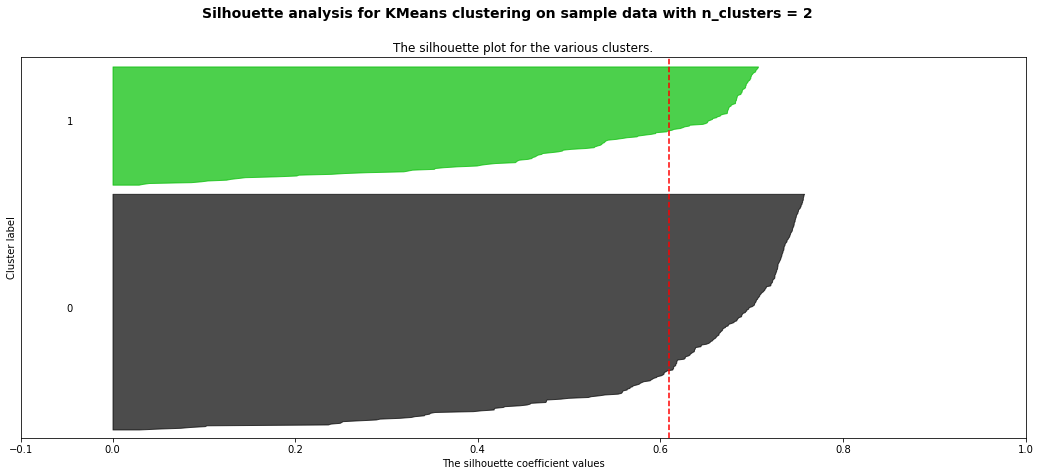

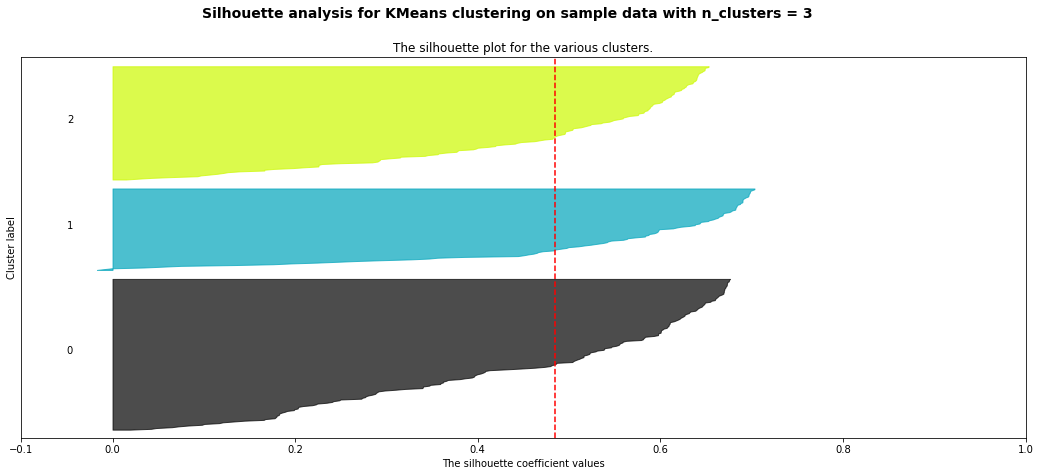

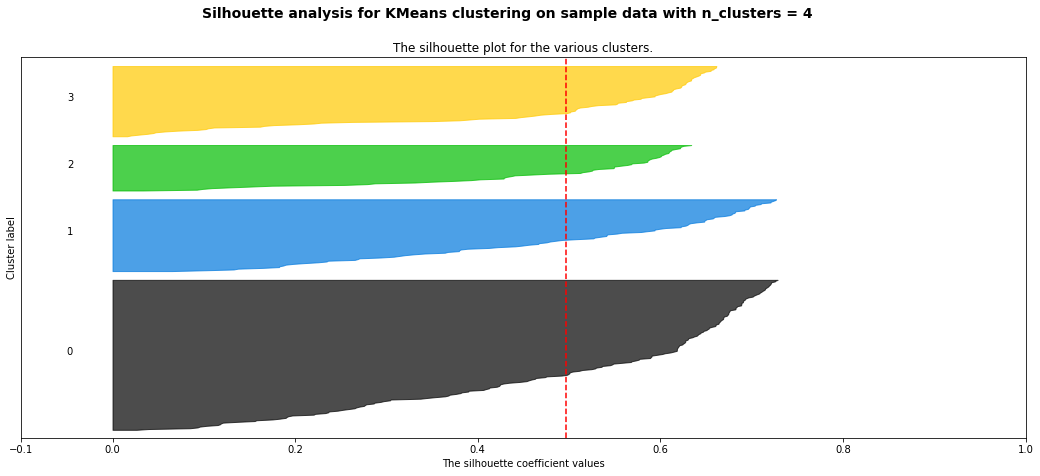

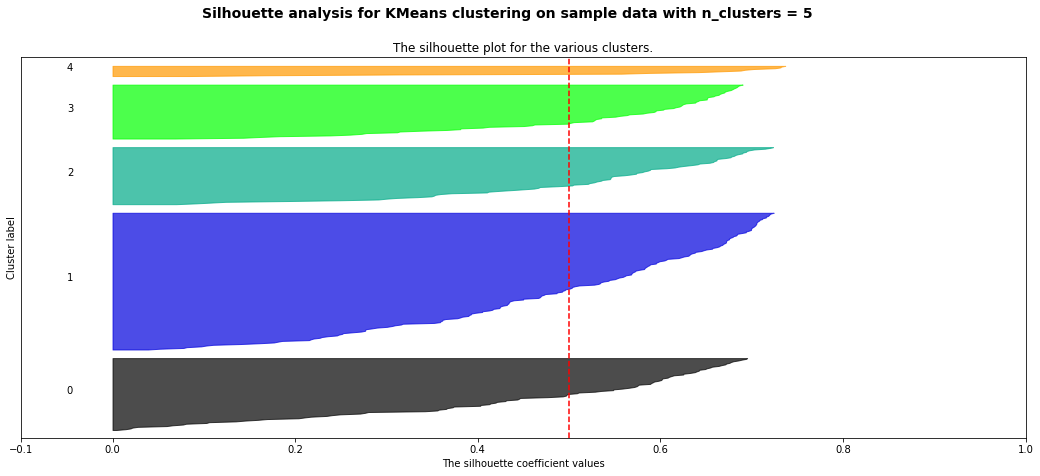

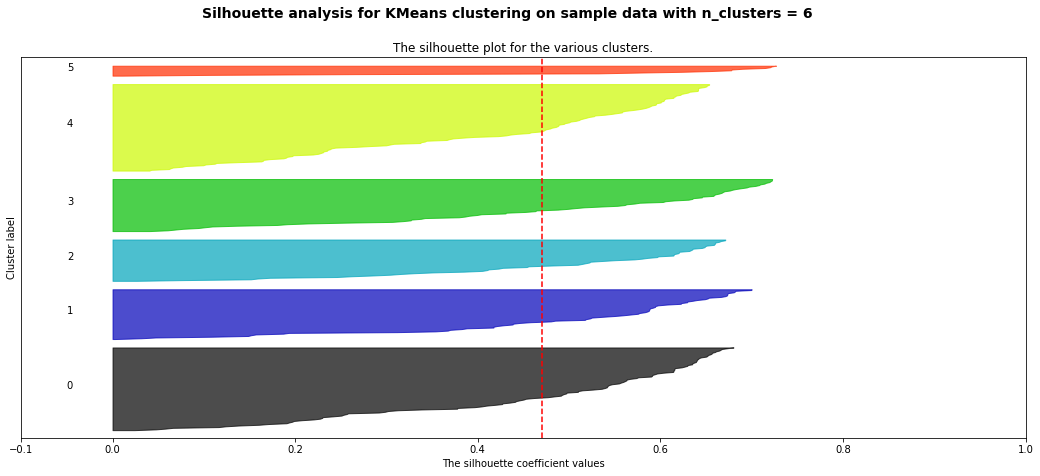

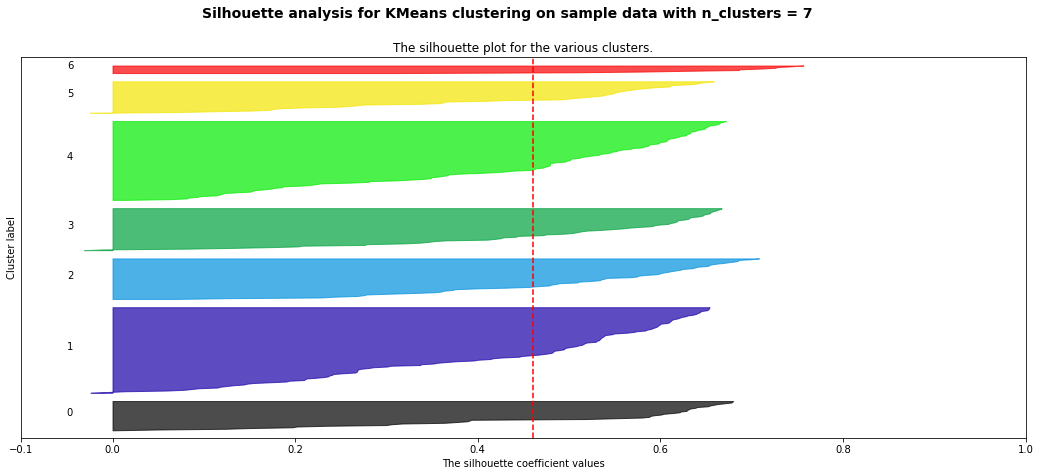

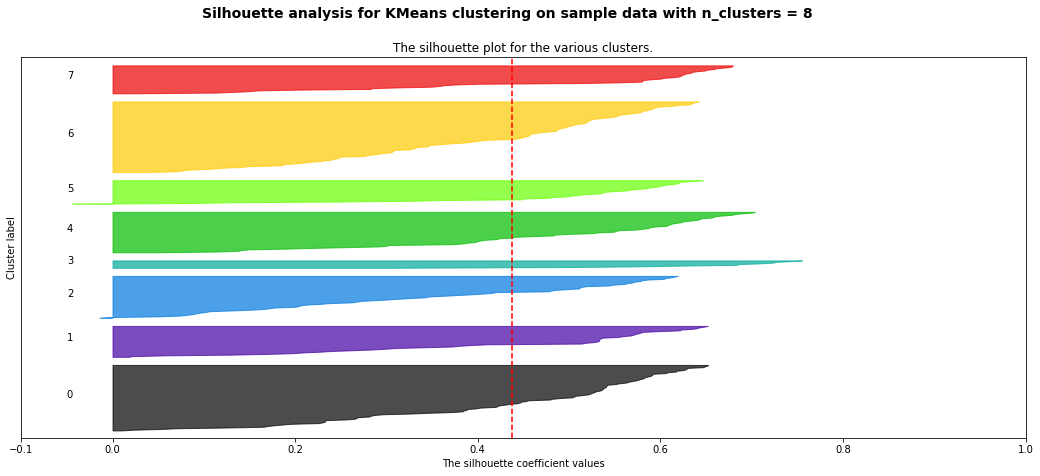

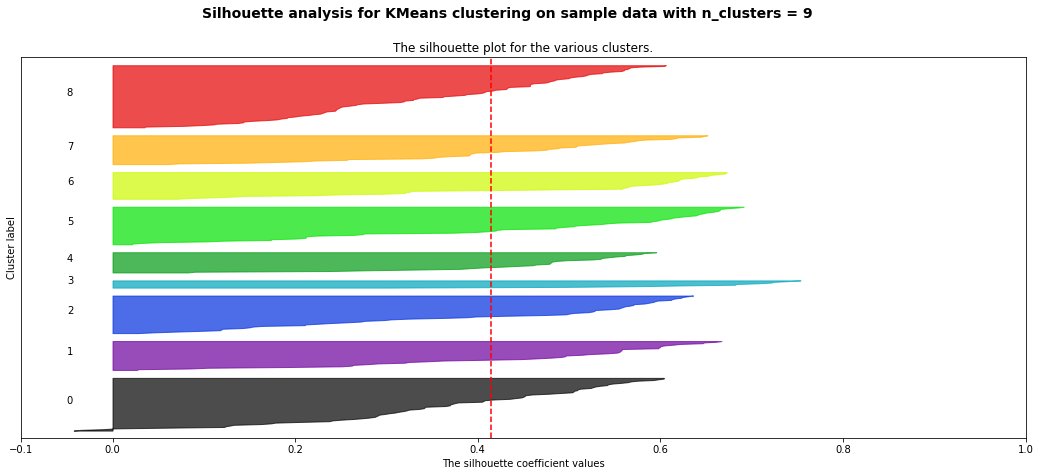

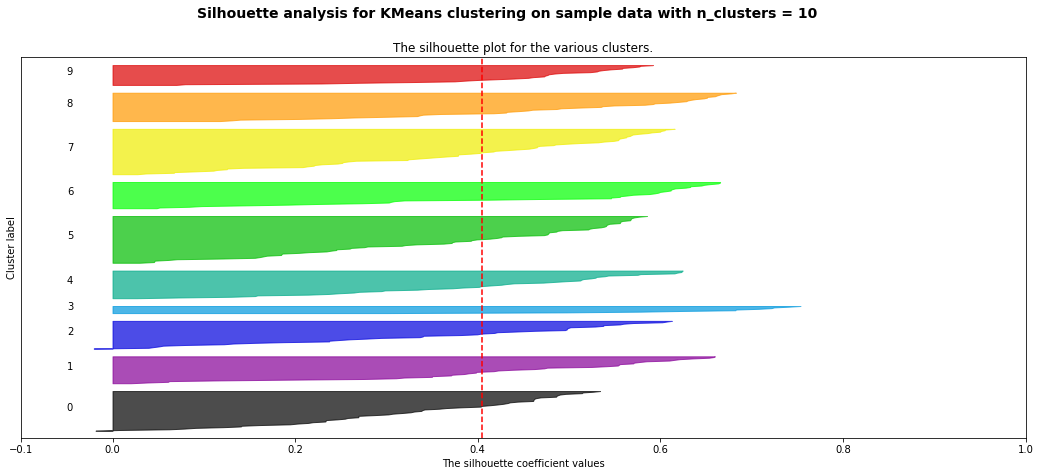

In [7]:
import matplotlib.cm as cm
from sklearn.datasets import make_blobs

for num_clusters in cluster_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset_median_outliers) + (num_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=num_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataset_median_outliers)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(dataset_median_outliers, cluster_labels)
    print("For n_clusters =", num_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(dataset_median_outliers, cluster_labels)
    y_lower = 10
    
    for i in range(num_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % num_clusters),
             fontsize=14, fontweight='bold')

plt.show()

### Draw Graph

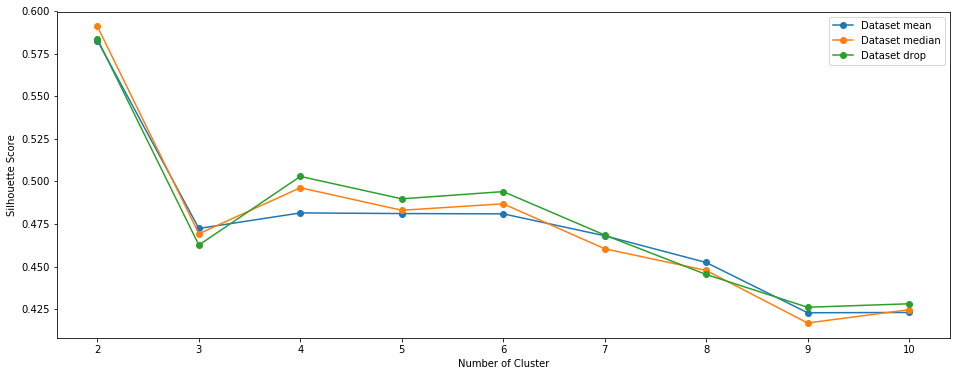

In [8]:
plt.figure(figsize=(16,6))
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Cluster')
plt.plot(clusters_df_mean.num_clusters, clusters_df_mean.shilouette_score, marker = "o",label='Dataset mean')
plt.plot(clusters_df_median.num_clusters, clusters_df_median.shilouette_score, marker = "o",label='Dataset median')
plt.plot(clusters_df_drop.num_clusters, clusters_df_drop.shilouette_score, marker = "o",label='Dataset drop')
plt.legend()

### Clustering dataset imputer median without outliers with K-Means 

SS Impute dataset_median outliers : 	0.5026297518513203


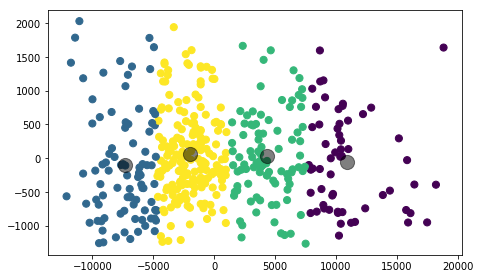

In [9]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import metrics

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(dataset_median_outliers)
kmeans_cluster = KMeans(n_clusters=4, random_state=0)
kmeans_cluster.fit(sklearn_transf)
y_kmeans = kmeans_cluster.predict(sklearn_transf)

fig = plt.figure()
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

plt.scatter(sklearn_transf[:, 0], sklearn_transf[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans_cluster.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

silhouette_score = metrics.silhouette_score(sklearn_transf,kmeans_cluster.labels_,metric ='euclidean')
print("SS Impute dataset_median outliers : \t"+str(silhouette_score))

### Divide and analyze the correlation between 2 attributes

In [12]:
import seaborn as sns
df = dataset_median
X = df[["Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
        "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D"
        ,"SSV-D","SED-D","COND-D","PH-S","DBO-S","SQO-S","SS-S","SSV-S","SED-S","COND-S"
        ,"RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G"
        ,"RD-SS-G","RD-SED-G"]]

name = ["Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
        "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D"
        ,"SSV-D","SED-D","COND-D","PH-S","DBO-S","SQO-S","SS-S","SSV-S","SED-S","COND-S"
        ,"RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G"
        ,"RD-SS-G","RD-SED-G"]
clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['cluster'] = clusters.labels_
df.sort_values(by=['cluster'],ascending = True)
variables_correlation = df[name]
variables_correlation.corr()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
Q-E,1.000000,0.035379,0.143694,-0.235336,-0.332015,-0.009056,-0.322903,-0.119991,-0.082804,0.159922,...,-0.071652,-0.054095,-0.026189,-0.058666,-0.011737,-0.065965,-0.070549,-0.164040,-0.016721,-0.002184
ZN-E,0.035379,1.000000,-0.010569,-0.010927,0.081145,0.090819,-0.096301,0.079387,0.054471,0.000565,...,0.071193,-0.059016,0.049686,0.015127,0.062657,0.021419,0.031868,0.040080,0.121044,0.031478
PH-E,0.143694,-0.010569,1.000000,0.208525,0.180229,-0.046122,0.185754,0.055213,0.272851,0.902909,...,0.234467,-0.032956,-0.153702,-0.134733,0.190621,0.212687,0.115108,0.142274,0.061319,0.035401
DBO-E,-0.235336,-0.010927,0.208525,1.000000,0.546032,0.136713,0.244837,0.267472,0.214096,0.198432,...,0.206659,0.184790,-0.017742,-0.052871,0.157065,0.101666,0.305165,0.161265,0.018308,-0.038435
DQO-E,-0.332015,0.081145,0.180229,0.546032,1.000000,0.286222,0.252916,0.425723,0.309844,0.174026,...,0.278536,0.089279,0.124898,0.047784,0.063711,0.083099,0.111516,0.309847,0.107491,0.007259
SS-E,-0.009056,0.090819,-0.046122,0.136713,0.286222,1.000000,-0.543975,0.573827,0.083367,-0.100279,...,0.078322,0.183718,0.478243,0.131083,-0.010928,-0.037247,0.076141,0.151593,0.257270,0.006879
SSV-E,-0.322903,-0.096301,0.185754,0.244837,0.252916,-0.543975,1.000000,-0.139388,0.168682,0.220783,...,0.161825,-0.148272,-0.396907,-0.065965,0.091335,0.157972,0.019201,0.063361,-0.189219,0.029389
SED-E,-0.119991,0.079387,0.055213,0.267472,0.425723,0.573827,-0.139388,1.000000,0.187428,0.049203,...,0.156228,0.082186,0.321672,0.140814,0.033434,0.092009,0.084711,0.216779,0.196875,0.046405
COND-E,-0.082804,0.054471,0.272851,0.214096,0.309844,0.083367,0.168682,0.187428,1.000000,0.244974,...,0.902453,-0.030581,0.058483,0.042244,0.125730,0.083082,0.097723,0.049268,0.027436,0.053005
PH-P,0.159922,0.000565,0.902909,0.198432,0.174026,-0.100279,0.220783,0.049203,0.244974,1.000000,...,0.208402,-0.040103,-0.192218,-0.164348,0.156605,0.192135,0.072437,0.110349,0.029657,0.027879


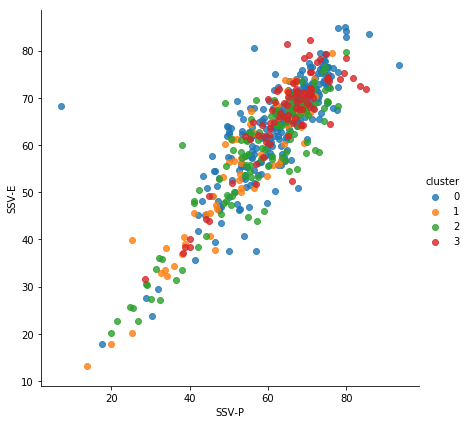

In [13]:
sns.lmplot('SSV-P' ,'SSV-E', data=df,
        hue = "cluster",
        fit_reg=False, height = 6 );

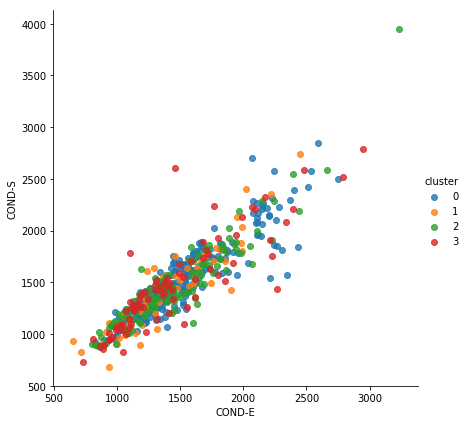

In [14]:
sns.lmplot('COND-E' ,'COND-S', data=df,
        hue = "cluster",
        fit_reg=False, height = 6 );

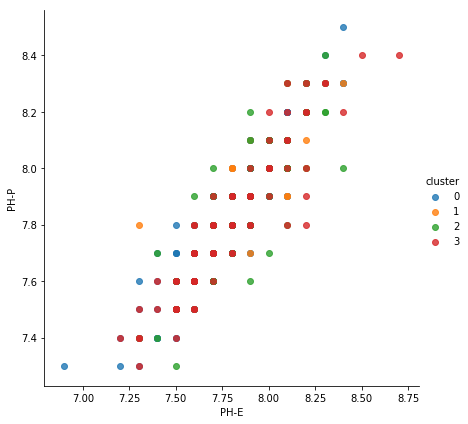

In [15]:
sns.lmplot('PH-E' ,'PH-P', data=df,
        hue = "cluster",
        fit_reg=False, height = 6 );